In [1]:
import sys
import os

# Add the parent directory (project root) to sys.path
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [3]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')

In [6]:
df_aple = pd.read_csv(f'../data/yfinance_data/AAPL_historical_data.csv')

In [7]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [8]:
df_aple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [11]:
print(sorted(df['stock'].unique()))

['A', 'AA', 'AAC', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAU', 'AAV', 'AAVL', 'AAWW', 'AAXJ', 'AB', 'ABAC', 'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABCO', 'ABCW', 'ABDC', 'ABEV', 'ABG', 'ABGB', 'ABIO', 'ABM', 'ABMD', 'ABR', 'ABTL', 'ABX', 'ABY', 'ACAD', 'ACAS', 'ACAT', 'ACC', 'ACCO', 'ACCU', 'ACE', 'ACET', 'ACFC', 'ACFN', 'ACG', 'ACGL', 'ACH', 'ACHC', 'ACHN', 'ACIW', 'ACLS', 'ACM', 'ACMP', 'ACN', 'ACNB', 'ACOR', 'ACP', 'ACPW', 'ACRE', 'ACRX', 'ACSF', 'ACST', 'ACT', 'ACTA', 'ACTG', 'ACTS', 'ACU', 'ACUR', 'ACWI', 'ACWV', 'ACWX', 'ACXM', 'ACY', 'ADAT', 'ADBE', 'ADC', 'ADEP', 'ADES', 'ADGE', 'ADHD', 'ADI', 'ADK', 'ADM', 'ADMA', 'ADMP', 'ADMS', 'ADNC', 'ADP', 'ADPT', 'ADRA', 'ADRD', 'ADRE', 'ADRU', 'ADS', 'ADSK', 'ADT', 'ADTN', 'ADVS', 'ADX', 'ADXS', 'ADZ', 'AE', 'AEB', 'AEC', 'AEE', 'AEG', 'AEGN', 'AEGR', 'AEHR', 'AEIS', 'AEL', 'AEM', 'AEO', 'AEPI', 'AER', 'AERI', 'AES', 'AET', 'AETI', 'AEY', 'AEZS', 'AF', 'AFA', 'AFAM', 'AFB', 'AFC', 'AFCB', 'AFFX', 

In [13]:
aapl_news = df[df['stock'] == 'AAPL'].copy()

In [15]:
aapl_news.shape

(441, 6)

In [17]:
aapl_news['date'] = pd.to_datetime(aapl_news['date'], errors='coerce')


In [18]:
aapl_news['date'] = aapl_news['date'].dt.date

In [19]:
from textblob import TextBlob

# Compute sentiment polarity for each headline
aapl_news['sentiment'] = aapl_news['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


In [20]:
daily_sentiment = aapl_news.groupby('date')['sentiment'].mean().reset_index()

In [21]:
df_aple['Date'] = pd.to_datetime(df_aple['Date']).dt.date

In [22]:
df_aple['daily_return'] = df_aple['Close'].pct_change()

In [23]:
stock_returns = df_aple[['Date', 'daily_return']].copy()

In [24]:
# Merge on matching dates
merged_df = pd.merge(daily_sentiment, stock_returns, left_on='date', right_on='Date')

# Drop rows with NA (from pct_change or no sentiment)
merged_df.dropna(inplace=True)

In [27]:
merged_df.head()

,date,sentiment,Date,daily_return
0,2020-06-09,0.088333,2020-06-09,0.031578
1,2020-06-10,0.166919,2020-06-10,0.025728


In [25]:
correlation = merged_df['sentiment'].corr(merged_df['daily_return'])
print(f"📈 Correlation between sentiment and stock return: {correlation:.4f}")

📈 Correlation between sentiment and stock return: -1.0000


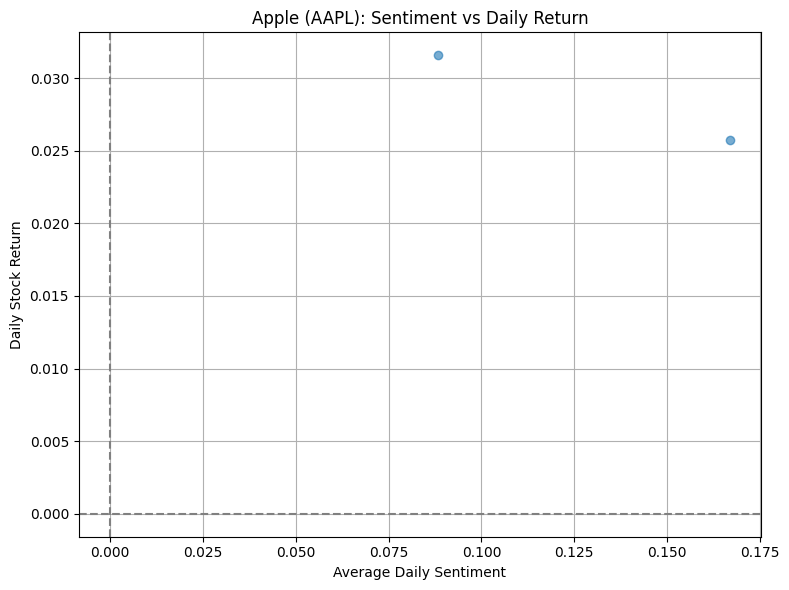

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(merged_df['sentiment'], merged_df['daily_return'], alpha=0.6)
plt.title("Apple (AAPL): Sentiment vs Daily Return")
plt.xlabel("Average Daily Sentiment")
plt.ylabel("Daily Stock Return")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()